In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
def plot(ax, items, title, y_label, x_label):
    n_epochs = len(list(items.items())[0][1])
    epochs = np.arange(1, n_epochs + 1)
    
    labels = list()
    for label, item in items.items():
        if item:
            ax.plot(epochs, item)
            labels.append(label)

    ax.set_title(title)
    ax.set_xlabel(y_label)
    ax.set_ylabel(x_label)
    ax.legend(labels, loc='upper left')

In [3]:
path = "models/pytorch/inter-80-10-10/{}/stats.csv"

In [4]:
"""
section = "layers"

filenames = [
    path.format("exp_02-2_layers"),
    path.format("exp_01-baseline"),
    path.format("exp_03-4_layers"),
    path.format("exp_04-5_layers"),
]

names = [
    "2 skryté vrstvy",
    "3 skryté vrstvy\n(výchozí model)",
    "4 skryté vsrtvy",
    "5 skrytých vrstev",
]
"""

'\nsection = "layers"\n\nfilenames = [\n    path.format("exp_02-2_layers"),\n    path.format("exp_01-baseline"),\n    path.format("exp_03-4_layers"),\n    path.format("exp_04-5_layers"),\n]\n\nnames = [\n    "2 skryté vrstvy",\n    "3 skryté vrstvy\n(výchozí model)",\n    "4 skryté vsrtvy",\n    "5 skrytých vrstev",\n]\n'

In [5]:
"""
section = "margin"

filenames = [
    path.format("exp_05-margin_5"),
    path.format("exp_06-margin_15"),
    path.format("exp_01-baseline"),
    path.format("exp_07-margin_30"),
    path.format("exp_08-margin_50"),
]

names = [
    "velikost okolí 5",
    "velikost okolí 15",
    "velikost okolí 25\n(výchozí model)",
    "velikost okolí 30",
    "velikost okolí 50",
]
"""

'\nsection = "margin"\n\nfilenames = [\n    path.format("exp_05-margin_5"),\n    path.format("exp_06-margin_15"),\n    path.format("exp_01-baseline"),\n    path.format("exp_07-margin_30"),\n    path.format("exp_08-margin_50"),\n]\n\nnames = [\n    "velikost okolí 5",\n    "velikost okolí 15",\n    "velikost okolí 25\n(výchozí model)",\n    "velikost okolí 30",\n    "velikost okolí 50",\n]\n'

In [6]:
"""
section = "width"

filenames = [
    path.format("exp_09-width_16"),
    path.format("exp_10-width_64"),
    path.format("exp_01-baseline"),
    path.format("exp_11-width_256"),
    path.format("exp_12-width_512"),
]

names = [
    "šířka vrstev 16",
    "šířka vrstev 64",
    "šířka vrstev 128\n(výchozí model)",
    "šířka vrstev 256",
    "šířka vrstev 512",
]
"""

'\nsection = "width"\n\nfilenames = [\n    path.format("exp_09-width_16"),\n    path.format("exp_10-width_64"),\n    path.format("exp_01-baseline"),\n    path.format("exp_11-width_256"),\n    path.format("exp_12-width_512"),\n]\n\nnames = [\n    "šířka vrstev 16",\n    "šířka vrstev 64",\n    "šířka vrstev 128\n(výchozí model)",\n    "šířka vrstev 256",\n    "šířka vrstev 512",\n]\n'

In [7]:
"""
section = "emotion_reduction"


filenames = [
    path.format("exp_22-3_emotions"),
    path.format("exp_21-4_emotions"),
    path.format("exp_01-baseline"),
]

names = [
    "3 emoce",
    "4 emoce",
    "7 emocí\n(výchozí model)",
]
"""

'\nsection = "emotion_reduction"\n\n\nfilenames = [\n    path.format("exp_22-3_emotions"),\n    path.format("exp_21-4_emotions"),\n    path.format("exp_01-baseline"),\n]\n\nnames = [\n    "3 emoce",\n    "4 emoce",\n    "7 emocí\n(výchozí model)",\n]\n'

In [8]:
"""
section = "regularization"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_13-drop_out"),
    path.format("exp_14-batch_norm"),
    path.format("exp_15-drop_out_and_batch_norm"),
]

names = [
    "není (výchozí model)",
    "dropout",
    "normalizace dávek",
    "dropout s normalizací dávek",
]
"""

'\nsection = "regularization"\n\nfilenames = [\n    path.format("exp_01-baseline"),\n    path.format("exp_13-drop_out"),\n    path.format("exp_14-batch_norm"),\n    path.format("exp_15-drop_out_and_batch_norm"),\n]\n\nnames = [\n    "není (výchozí model)",\n    "dropout",\n    "normalizace dávek",\n    "dropout s normalizací dávek",\n]\n'

In [9]:
"""
path = "models/pytorch/{}/stats.csv"

section = "batch_size"

filenames = [
    path.format("exp_16-batch_norm"),
    path.format("exp_21-batch_64"),
    path.format("exp_17-batch_128"),
    path.format("exp_20-batch_256"),
]

names = [
    "drop out s normalizací dávek",
    "velikost dávky 64",
    "velikost dávky 128",
    "velikost dávky 256",
]
"""

'\npath = "models/pytorch/{}/stats.csv"\n\nsection = "batch_size"\n\nfilenames = [\n    path.format("exp_16-batch_norm"),\n    path.format("exp_21-batch_64"),\n    path.format("exp_17-batch_128"),\n    path.format("exp_20-batch_256"),\n]\n\nnames = [\n    "drop out s normalizací dávek",\n    "velikost dávky 64",\n    "velikost dávky 128",\n    "velikost dávky 256",\n]\n'

In [10]:
section = "final"

filenames = [
    path.format("exp_01-baseline"),
    path.format("exp_37-7_emotions-50_margin"),
    path.format("exp_38-4_emotions-50_margin"),
    path.format("exp_39-3_emotions-50_margin"),
]

names = [
    "7 emocí\n(výchozí model)",
    "7 emocí",
    "4 emoce",
    "3 emoce",
]

In [11]:
experiments = []

for filename in filenames:
    exp = pd.read_csv(filename)
    experiments.append(exp)

In [12]:
"""
experiments = pd.concat(experiments)
experiments.reset_index(inplace=True, drop=True)
experiments = [experiments]
"""

'\nexperiments = pd.concat(experiments)\nexperiments.reset_index(inplace=True, drop=True)\nexperiments = [experiments]\n'

In [13]:
train_losses = {}
val_losses = {}

train_frame_acc = {}
val_frame_acc = {}

In [14]:
len(experiments)

4

In [15]:
for name, exp in zip(names, experiments):
    train_frame_acc[name] = list(exp['frame acc trénovací sada'])
    val_frame_acc[name] = list(exp['frame acc validační sada'])
    
    train_losses[name] = list(exp['losses trénovací sada'])
    val_losses[name] = list(exp['losses validační sada'])

In [16]:
# name = '2 vrstvy'
# print("val loss ", val_losses[name][-1])
# print("train loss ", train_losses[name][-1])
# print("val frame acc ", val_frame_acc[name][-1])
# print("train frame acc", train_frame_acc[name][-1])

In [17]:
val_losses.keys()

dict_keys(['7 emocí\n(výchozí model)', '7 emocí', '4 emoce', '3 emoce'])

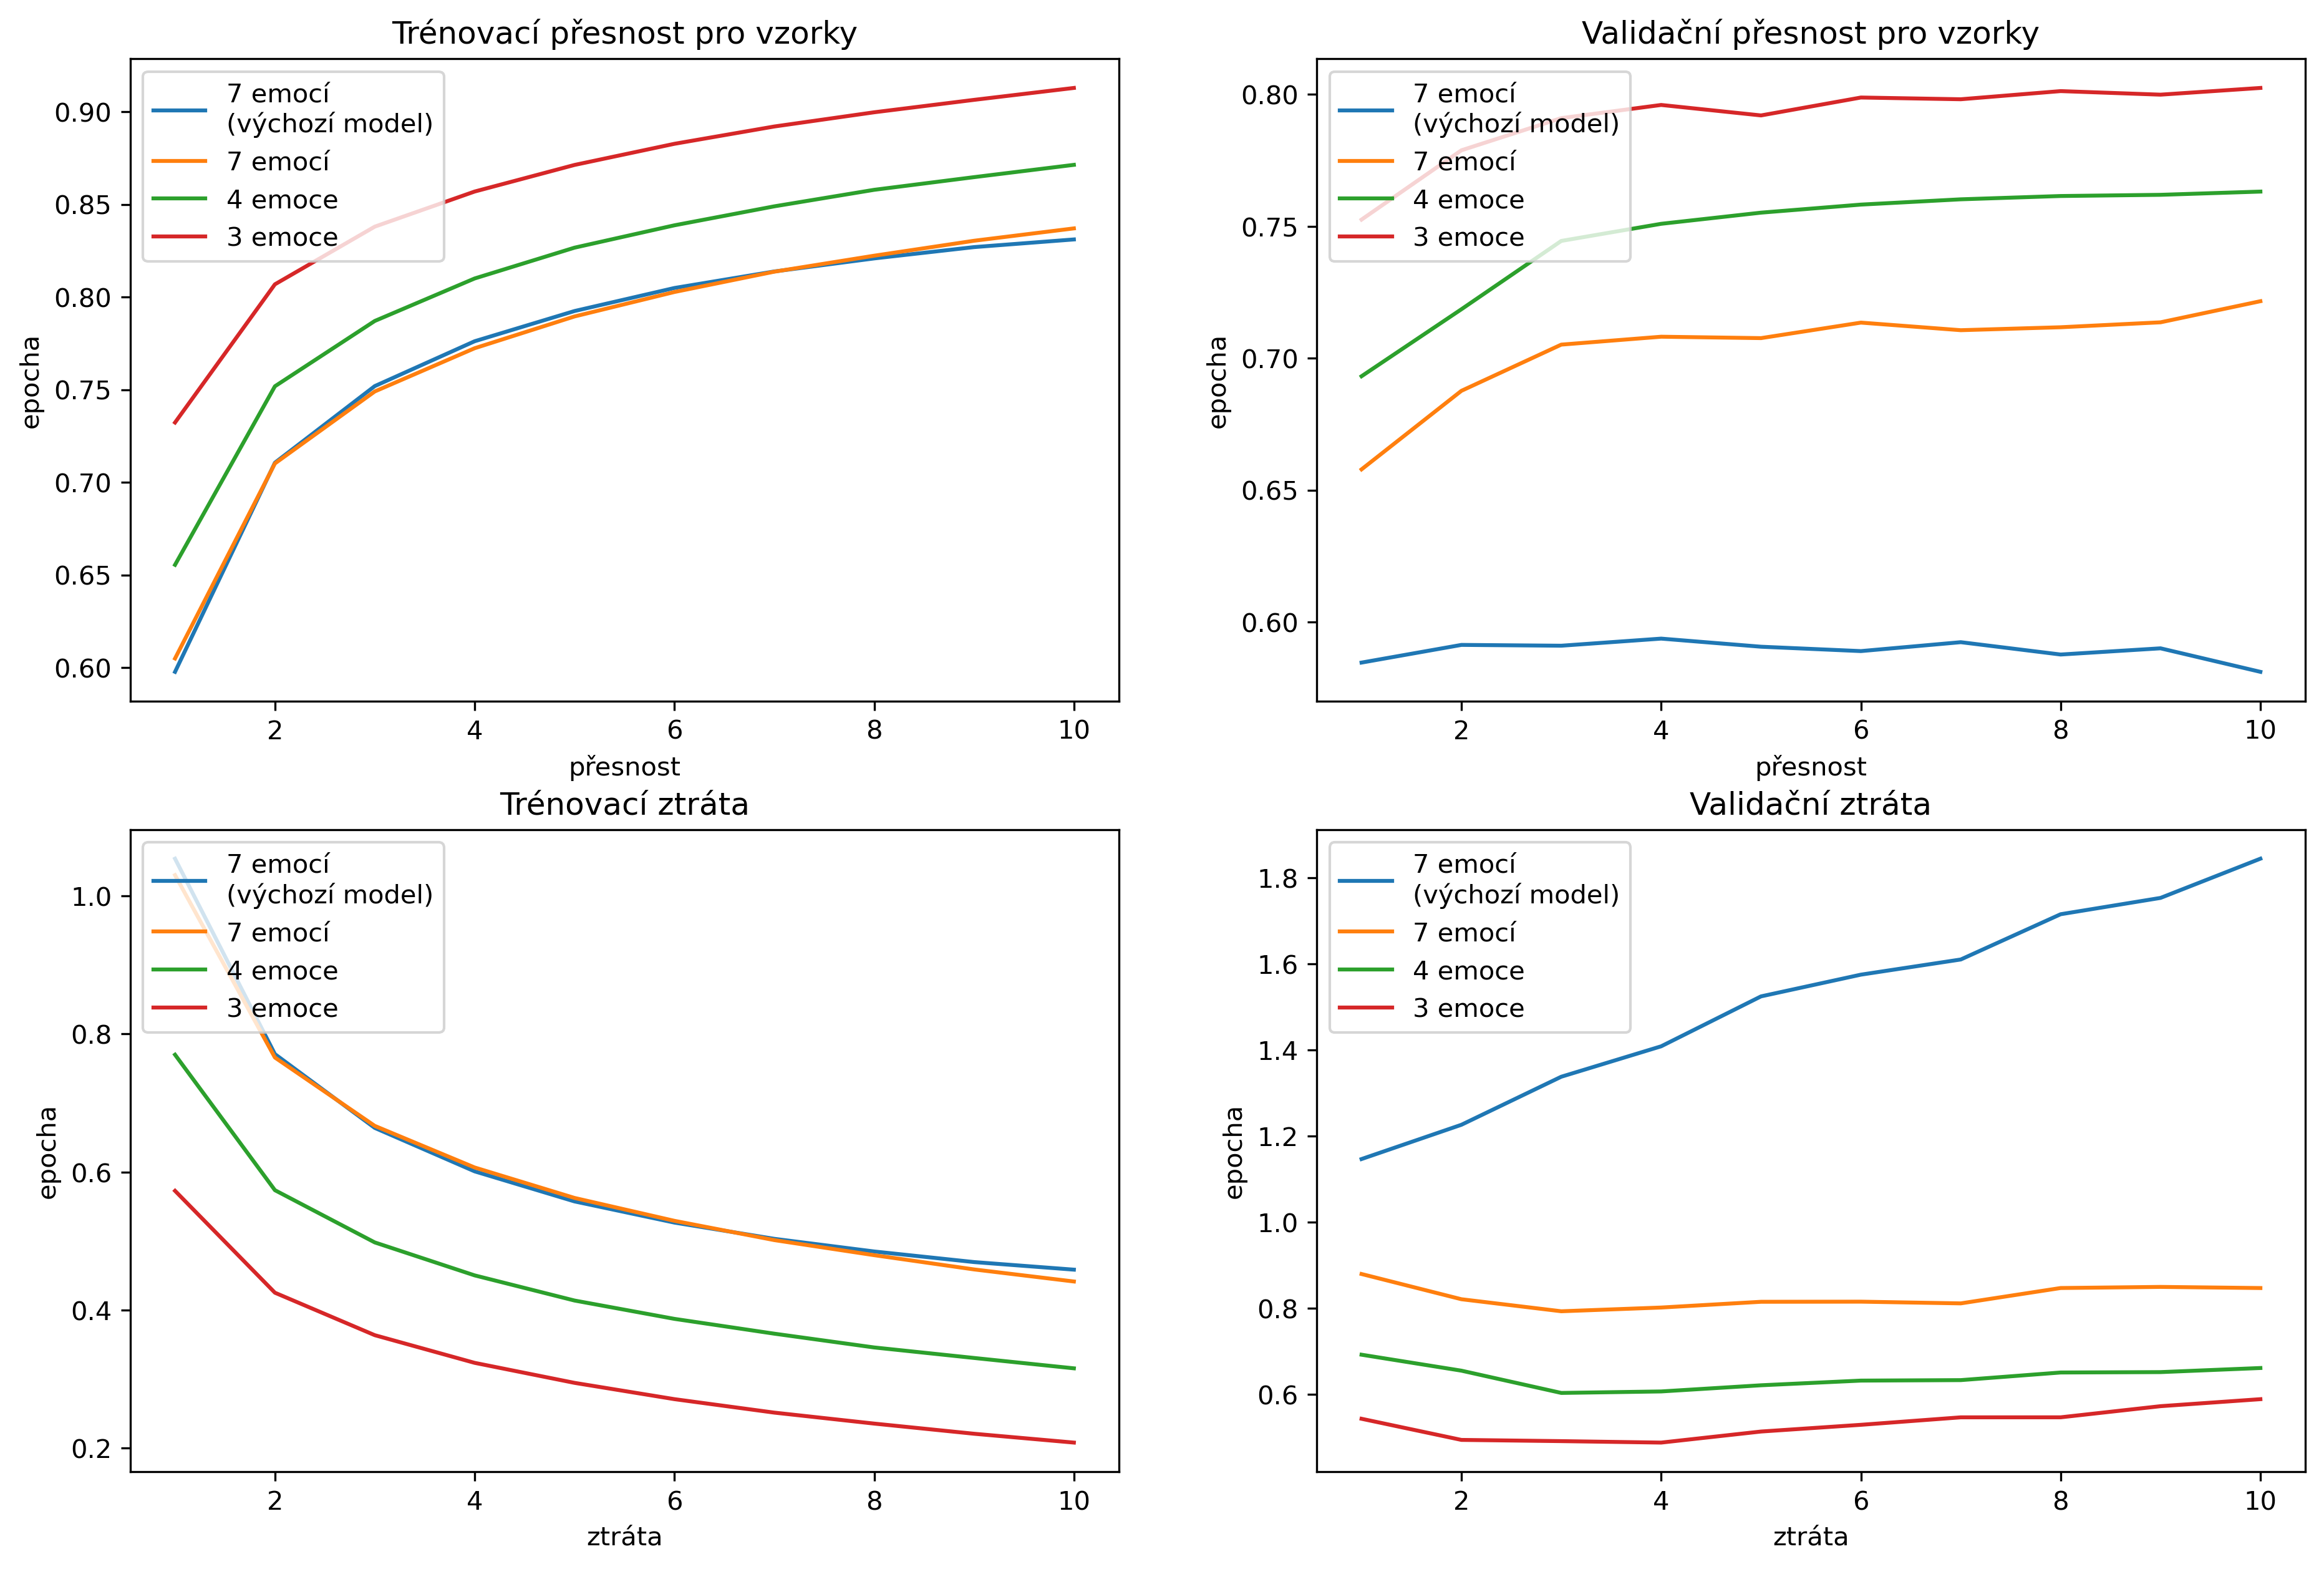

In [18]:
empty = "#"
titles = [
    "Trénovací přesnost pro vzorky",
    "Validační přesnost pro vzorky",
    "Trénovací ztráta",
    "Validační ztráta",
]

y_labels = [
    "přesnost",
    "přesnost",
    "ztráta",
    "ztráta",
]

items = [
    train_frame_acc,
    val_frame_acc,
    train_losses,
    val_losses,
]

n_rows = 2
n_cols = 2
dpi = 300
final_fig , axes = plt.subplots(n_rows, n_cols, dpi=dpi)
final_fig.set_figheight(10)
final_fig.set_figwidth(15)

for row in range(n_rows):
    for col in range(n_cols):
        ax = axes[row][col]
        
        index = row * n_cols + col
        title = titles[index]
        
        if title == empty:
            final_fig.delaxes(axes[row][col])
            continue
        
        item = items[index]
        
        y_label = y_labels[index]
        
        plot(ax, item, title, y_label, "epocha")

In [19]:
dirname = "/Users/tomaspetricek/TUL/TUL_2020:21/BP/Speech_Emotion_Recognition/Attachments/"
title = "training_course-{}".format(section)
filename = title + ".png"
path = os.path.join(dirname, filename)
final_fig.savefig(path, dpi=dpi)

In [20]:
stop

NameError: name 'stop' is not defined

### Confussion Matrix

In [ ]:
def plot_conf_matrix(ax, conf_matrix, annot, title, y_label, x_label):
    sns.heatmap(conf_matrix, ax=ax, annot=annot, fmt="")
    

    ax.set_title(title)
    ax.set_xlabel(y_label)
    ax.set_ylabel(x_label)
    plt.tight_layout()

In [ ]:
classes = ["Pozitivní", "Negativní"]
annot = np.array([
    ["pravdivé pozitivní", "nepravdivé pozitivní"],
    ["nepravdivé negativní", "pravdivé negativní"],
])

conf_matrix = np.array([
    [10, 11],
    [27, 19],
])

conf_matrix_df = pd.DataFrame(conf_matrix, classes, classes)

In [ ]:
fig, ax = plt.subplots()

plot_conf_matrix(
    ax,
    conf_matrix_df,
    annot=annot,
    title="Matice záměn",
    y_label="předpovězené třídy",
    x_label="správné třídy",
)

In [ ]:
dpi = 300
dirname = "/Users/tomaspetricek/TUL/TUL_2020:21/BP/Speech_Emotion_Recognition/Attachments/"
title = "conf_matrix-example"
filename = title + ".png"
path = os.path.join(dirname, filename)
fig.savefig(path, dpi=dpi)